# Checkout statistical features of Spiral data 

### Import necessary  packages

In [1]:
import cv2
import numpy as np
import os
from skimage.morphology import skeletonize
from skimage.morphology import closing, square
from PIL import Image
import matplotlib.pyplot as plt
from utils import thin_spiral_image_with_custom_cut, find_spiral_point, \
         trace_spiral, get_angle_dist2, angle_cont_func, plt_traced
from numba.typed import List
from time import perf_counter
from scipy import signal
from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d

### Path to the data

In [2]:
path = r'C:\Users\Baumann\Documents\UU\03_semester\AIA\project\data'

### Import all files from path

control1.tiff


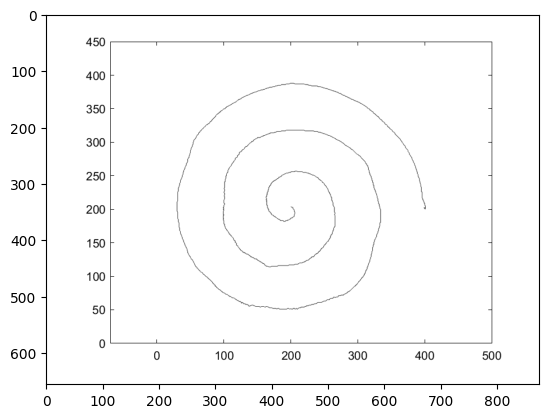

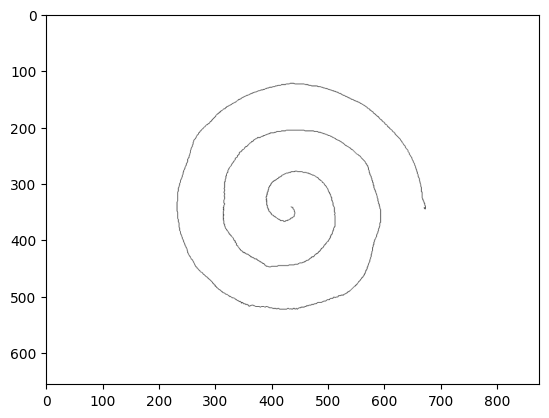

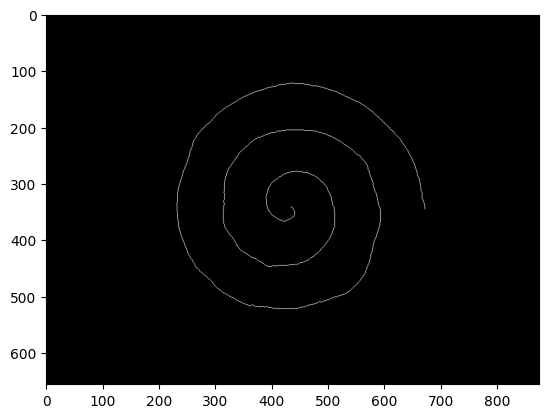

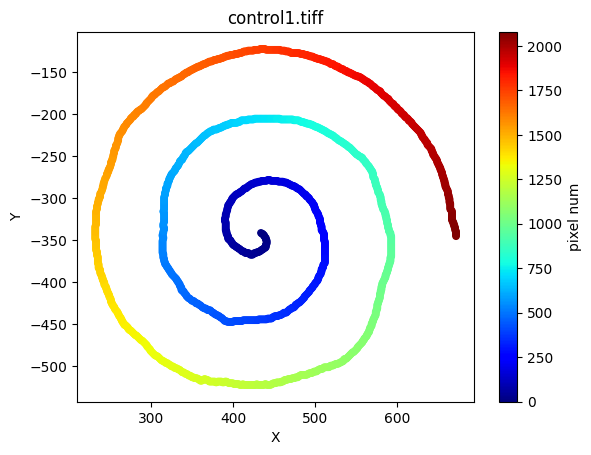

control10.tiff
control11.tiff
control12.tiff
control13.tiff
control14.tiff
control15.tiff
control2.tiff
control3.tiff
control4.tiff
control5.tiff
control6.tiff
control7.tiff
control8.tiff
control9.tiff
control_dynamic1.tiff
control_dynamic10.tiff
control_dynamic11.tiff
control_dynamic12.tiff
control_dynamic13.tiff
control_dynamic14.tiff
control_dynamic15.tiff
control_dynamic2.tiff
control_dynamic3.tiff
control_dynamic4.tiff
control_dynamic5.tiff
control_dynamic6.tiff
control_dynamic7.tiff
control_dynamic8.tiff
control_dynamic9.tiff
parkinson1.tiff
parkinson10.tiff
parkinson11.tiff
parkinson12.tiff
parkinson13.tiff
parkinson14.tiff
parkinson15.tiff
parkinson16.tiff
parkinson17.tiff
parkinson18.tiff
parkinson19.tiff
parkinson2.tiff
parkinson20.tiff
parkinson21.tiff
parkinson22.tiff
parkinson23.tiff
parkinson24.tiff
parkinson25.tiff
parkinson3.tiff
parkinson4.tiff
parkinson5.tiff
parkinson6.tiff
parkinson7.tiff
parkinson8.tiff
parkinson9.tiff
parkinson_dynamic1.tiff
parkinson_dynamic10.ti

In [298]:
names = []
trace_distances_all = []
trace_angle_all = []
all_paths = []
first = True

for file_path in os.listdir(path):
    print(file_path)
    # make sure file is .tiff
    if not file_path[-5:] == '.tiff':
        print('file was skipped')
        continue
    # create skeleton
    img, cut_img_cropped, skeleton_img_cropped = thin_spiral_image_with_custom_cut(
        path + '\\' + file_path, 
        white_out=True,  
        field_of_interest=[(57, -81), (122, -91)])        

    # find center/start_point of the spiral
    spiral_start = find_spiral_point(skeleton_img_cropped, point=(0, 0), first=True, search_radius=200)
    if not spiral_start:
        print('not possible to extract')
        plt.imshow(img)
        plt.show()
        continue
    # follow the start point through the spiral
    skeleton_img_trace = skeleton_img_cropped.copy()
    trace_path = trace_spiral(skeleton_img_trace, spiral_start, search_radius=200)
    trace_path_typed = List()
    [trace_path_typed.append(i) for i in trace_path]

    # turn the coordinates in angle and distance for an alternative representation
    trace_angle, trace_distances = get_angle_dist2(trace_path_typed)
    
    trace_angle_all.append(trace_angle)
    trace_distances_all.append(trace_distances)
    names.append(file_path)
    all_paths.append(trace_path)

    if first:
        plt.imshow(img,  'grey')
        plt.show()
        plt.imshow(cut_img_cropped,  'grey')
        plt.show()
        plt.imshow(skeleton_img_cropped, 'grey')
        plt.show()
        plt_traced(trace_path, file_path)
    first = False

## Squared Distance from the starting point 

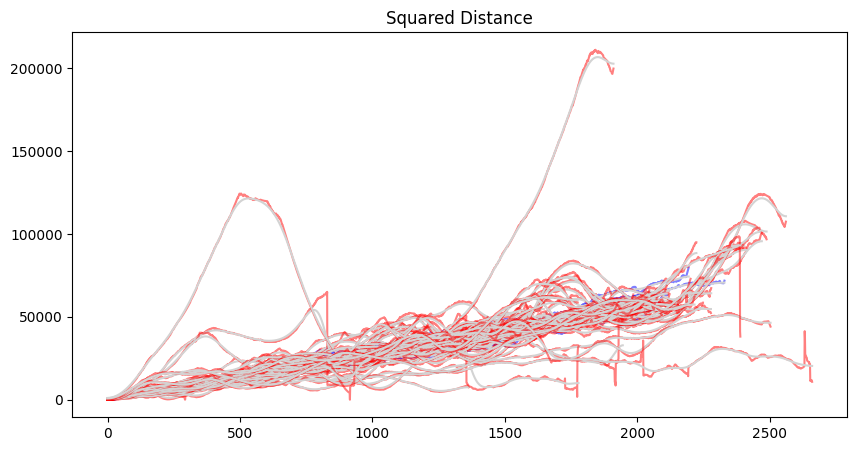

In [281]:
df = {}

plt.figure(figsize=(10, 5))
for d2, name in zip(trace_distances_all, names):
    df[name] = {}
    if True: #not 'dynamic' in name:
        x = np.array([k for k in range(len(d2))]).reshape((-1, 1))
        reg = LinearRegression().fit(x, d2)
        pred = reg.predict(x)
        pad = 0
        d2 = list([0.0 for _ in range(pad)]) + list(d2)
        #print(d2)
        filtered = gaussian_filter1d(d2, 160)[pad:]
        filtered2 = gaussian_filter1d(d2, 30)[pad:]
        filtered3 = gaussian_filter1d(d2, 5)[pad:]
        d2 = d2[pad:]
        
        color = 'red' if 'parkinson' in name else 'blue'
        plt.plot(d2, c=color, alpha=0.5)
        #plt.plot(pred, c='k')
        plt.plot(filtered2, c='lightgrey')

        df[name]['dist2'] = d2
        df[name]['dist2_linreg'] = pred
        df[name]['dist2_filtered'] = filtered
        df[name]['dist2_filtered2'] = filtered2
        df[name]['dist2_filtered3'] = filtered3
        
plt.title('Squared Distance')
plt.show()

## Squared Angle

In [282]:
# convert the angle to a continuous curve
trace_angle_continuous = angle_cont_func(trace_angle_all)


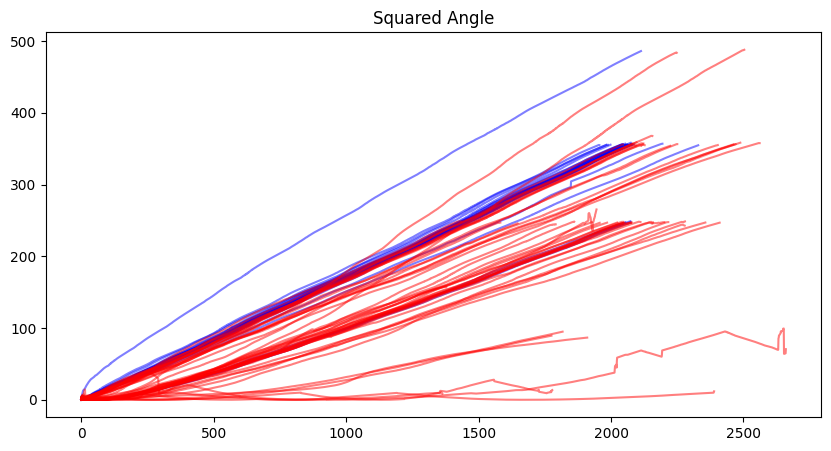

In [283]:
plt.figure(figsize=(10, 5))
for d2, name in zip(trace_angle_continuous, names):
    #df[name] = {}
    if True:#not 'dynamic' in name:
        d2 = [k*k for k in d2] 
        #d2 = d2 - d2[-1]
        #d2 = list(reversed(d2))
        x = np.array([k for k in range(len(d2))]).reshape((-1, 1))
        reg = LinearRegression().fit(x, d2)
        pred = reg.predict(x)
        filtered = gaussian_filter1d(d2, 10)

        
        color = 'red' if 'parkinson' in name else 'blue'
        plt.plot(d2, c=color, alpha=0.5)
        #plt.plot(pred, c='k')
        #plt.plot(filtered, c='lightgrey')

        df[name]['ang2'] = d2
        df[name]['ang2_linreg'] = pred
        df[name]['ang2_filtered'] = filtered
        df[name]['slope'] = reg.coef_
        df[name]['inter'] = reg.intercept_
        
plt.title('Squared Angle')
plt.show()

In [269]:
df['control3.tiff']['ang2'][-1]

354.88389637703943

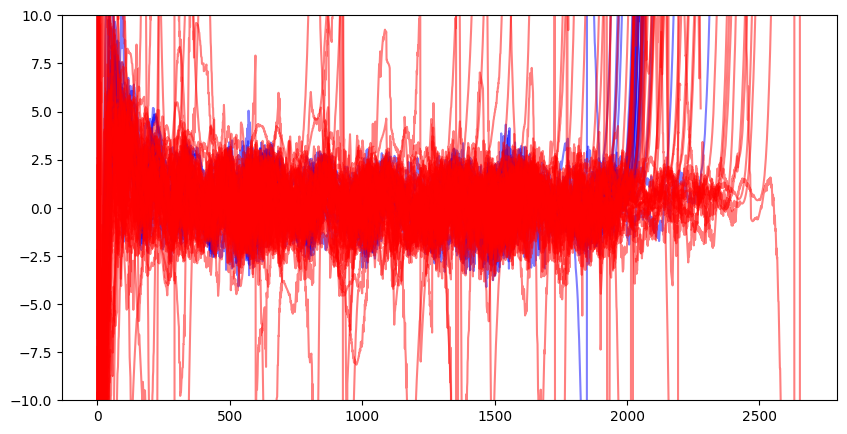

In [270]:
plt.figure(figsize=(10, 5))
for d2, name in zip(trace_angle_continuous, names):
    #df[name] = {}
    if True: #not 'dynamic' in name:
        #d2 = [k*k for k in d2] 
        x = np.array([k for k in range(len(d2))]).reshape((-1, 1))
        reg = LinearRegression().fit(x, d2)
        pred = reg.predict(x)
        filtered = gaussian_filter1d(d2, 30)
        
        #d2 = [(k-l)*np.sqrt(abs(m)) for k, l, m, n in zip(d2, filtered, df[name]['dist2'], df[name]['dist2_filtered'])] 
        #d2 = [(k-l) for k, l, m in zip(d2, filtered, df[name]['dist2'])] 
        d2 = [(k-l)*np.sqrt(abs(n)) for k, l, m, n in zip(d2, filtered, df[name]['dist2'], df[name]['dist2_filtered'])]
        
        color = 'red' if 'parkinson' in name else 'blue'
        plt.plot(d2, c=color, alpha=0.5)
        #plt.plot(pred, c='k')
        #plt.plot(filtered, c='lightgrey')
        
        df[name]['angle_alt'] = d2
        #df[name]['ang2_linreg'] = pred
        #df[name]['ang2_filtered'] = filtered
#plt.ylim((-0.1, 0.1))
#plt.ylim((-1, 1))
plt.ylim((-10, 10))
plt.title('')
plt.show()

### Angle x Distance

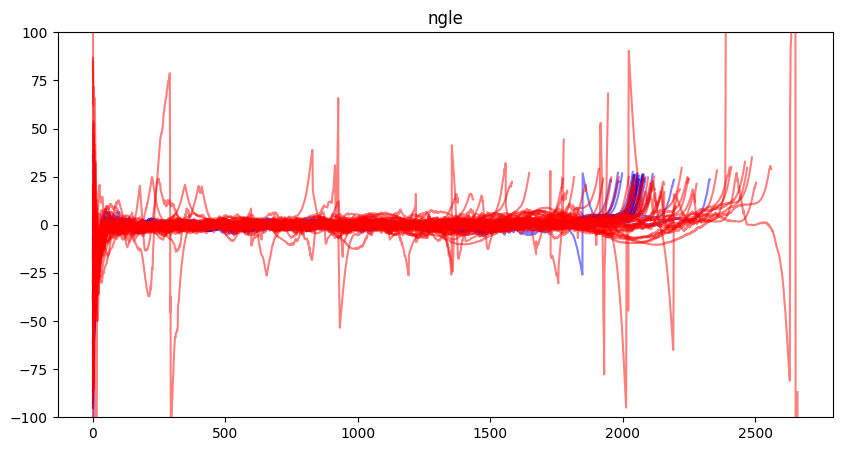

In [271]:
plt.figure(figsize=(10, 5))
for d2, name in zip(trace_angle_continuous, names):
    #df[name] = {}
    if True: #not 'dynamic' in name:
        d2 = [i*np.sqrt(j) for i, j in zip(d2, df[name]['dist2_filtered'])] 
        x = np.array([k for k in range(len(d2))]).reshape((-1, 1))
        reg = LinearRegression().fit(x, d2)
        pred = reg.predict(x)
        filtered = gaussian_filter1d(d2, 30)

        
        color = 'red' if 'parkinson' in name else 'blue'
        plt.plot([i-j for i, j in zip(d2, filtered)], c=color, alpha=0.5)
        #plt.plot(pred, c='k')
        #plt.plot(filtered, c='lightgrey')

        df[name]['rad'] = d2
        df[name]['rad_linreg'] = pred
        df[name]['rad_filtered'] = filtered
plt.ylim((-100,100))
plt.title('ngle')
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_256\419765183.py:25: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'blue' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_256\419765183.py:26: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'control1.tiff' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_256\419765183.py:27: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'x' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



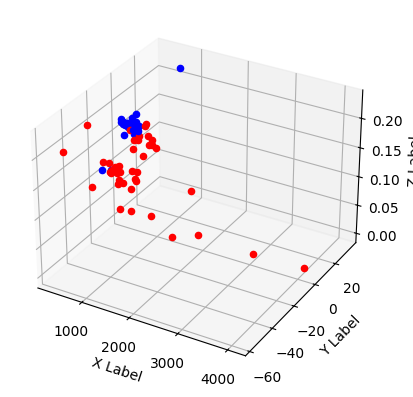

In [206]:
import pandas as pd

ax = None
plt.figure()
ax = plt.subplot(projection='3d') #figsize=(5,5))
#ax.set(zlim=(0,10))
df_plot = pd.DataFrame()

for i in df:
    p = 'red' if 'parkinson' in i else 'blue'
    sy = 'o' if 'dynamic' in i else 'x'
    
    x = np.std([k-j for k, j in zip(df[i]['dist2'], df[i]['dist2_filtered2'])])
    y = df[i]['inter']
    z = df[i]['slope']
    #y = np.std([k-j for k, j in zip(df[i]['dist2'], df[i]['dist2_filtered2'])])
    #z = np.std([k-j for k, j in zip(df[i]['dist2'], df[i]['dist2_filtered3'])])
    
    #y = np.std([k-j for k, j in zip(df[i]['ang2'], df[i]['ang2_filtered'])])
    #z = np.std([k-j for k, j in zip(df[i]['rad'], df[i]['rad_filtered'])])
    
    df_plot.loc[i, 'x'] = x
    df_plot.loc[i, 'y'] = y
    df_plot.loc[i, 'z'] = z
    df_plot.loc[i, 'c'] = p
    df_plot.loc[i, 'name'] = i
    df_plot.loc[i, 'symbol'] = sy
    
    ax.scatter(x, y, z, c=p)
    
    #t = i[-6:-5] if i[-7] in ['l', 'n'] else i[-7:-5]
    
    #ax.set_xlim((200,1250))
    #ax.set_ylim((60, 150))
    #ax.set_zlim((0,5))

    #plt.xscale('log')
    #plt.yscale('log')
    #plt.text(x*1.01, y*1.01, t)
    #print(i)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [207]:
import plotly.express as px

fig = px.scatter_3d(df_plot, 'x', 'y', 'z', color='c', symbol = 'symbol', hover_data='name')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')))
fig.write_html("test_plot.html")

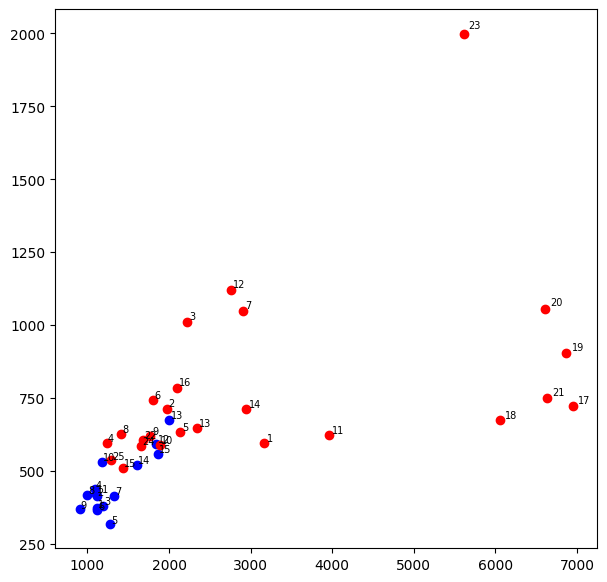

In [240]:
plt.figure(figsize=(7,7))
for name in df:
    if not 'dynamic' in name:
        sa, ea = 10, -10
        sd, ed = 10, -10
        c = 'red' if 'parkinson' in name else 'blue'
        x = np.std([i-j for i, j in zip(df[name]['dist2'][sd:ed], df[name]['dist2_filtered'][sd:ed])])
        y = np.std([i-j for i, j in zip(df[name]['dist2'][sa:ea], df[name]['dist2_filtered2'][sa:ea])])
        #y = df[name]['inter']
        #y = df[name]['slope']
        
        #y = np.std([i-j for i, j in zip(df[name]['rad'][50:-50], df[name]['rad_filtered'][50:-50])])
        #y = np.std(df[name]['angle_alt'][50:-50])
        t = name[-6:-5] if name[-7] in ['l', 'n', 'c'] else name[-7:-5]
        plt.scatter(x, y, c=c)
        plt.text(x*1.01, y*1.01, t, fontsize=7)
#plt.ylim((0, 1e3))
plt.show()

(-2000.0, 2000.0)

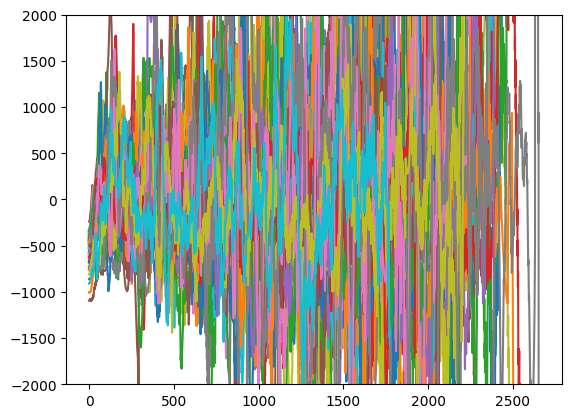

In [232]:
name = 'control14.tiff'
dist11 = [i-j for i, j in zip(df[name]['dist2'], df[name]['dist2_filtered'])]
dist12 = [i-j for i, j in zip(df[name]['dist2'], df[name]['dist2_filtered2'])]
#ang = [i-j for i, j in zip(df[name]['ang2'], df[name]['ang2_filtered'])]


name = 'parkinson15.tiff'
for name in df:
    #dist21 = [i-j for i, j in zip(df[name]['dist2'], df[name]['dist2_filtered'])]
    dist22 = [i-j for i, j in zip(df[name]['dist2'], df[name]['dist2_filtered2'])]
    #ang2 = [i-j for i, j in zip(df[name]['ang2'], df[name]['ang2_filtered'])]
    #plt.plot(dist12)
    plt.plot(dist22)
plt.ylim((-2000, 2000))

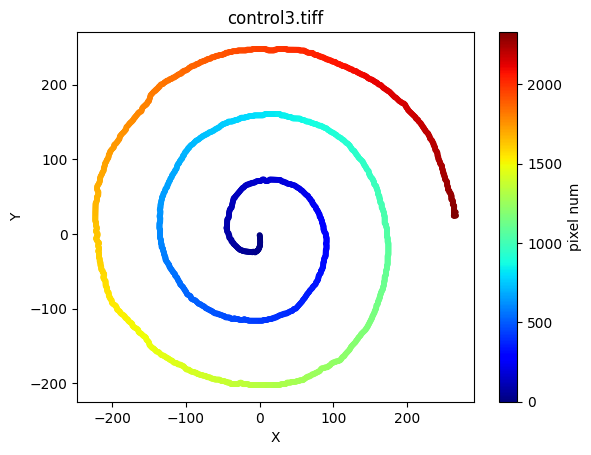

In [109]:
x_, y_, t = [], [], []
name_ = 'control3.tiff'
plt.figure()
for index, (a, d) in enumerate(zip(df[name_]['ang2_filtered'], df[name_]['dist2'])):
    x_.append(np.cos(np.sqrt(a))*np.sqrt(d))
    y_.append(-np.sin(np.sqrt(a))*np.sqrt(d))
    t.append(index)
plt.scatter(x_, y_, c=t, s=10, cmap='jet')
plt.colorbar(label='pixel num')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(name_)
plt.show()

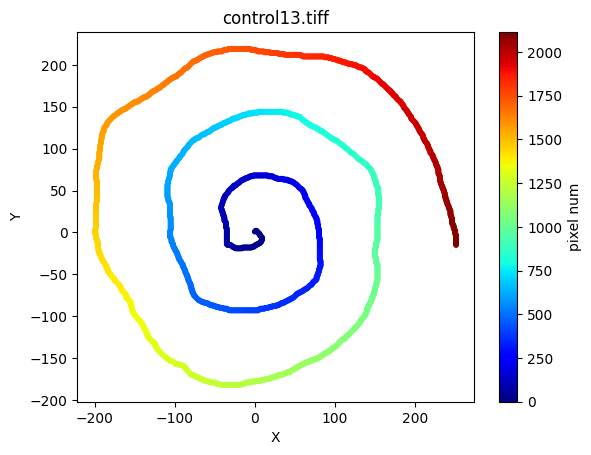

In [83]:
x_, y_, t = [], [], []
name_ = 'control13.tiff'
plt.figure()
for index, (a, d) in enumerate(zip(df[name_]['ang2'], df[name_]['dist2'])):
    x_.append(-np.cos(np.sqrt(a))*np.sqrt(d))
    y_.append(np.sin(np.sqrt(a))*np.sqrt(d))
    t.append(index)
plt.scatter(x_, y_, c=t, s=10, cmap='jet')
plt.colorbar(label='pixel num')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(name_)
plt.show()

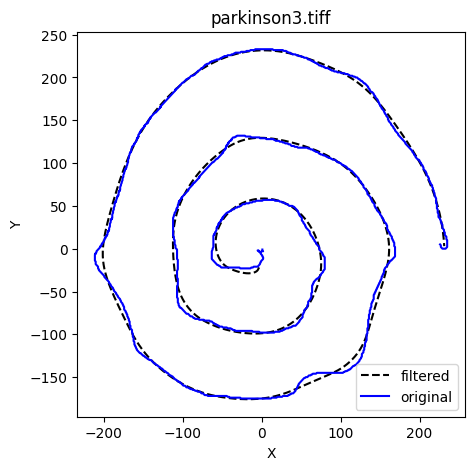

In [295]:
x_, y_, t = [], [], []
name_ = 'parkinson3.tiff'
plt.figure(figsize=(5,5))
for index, (a, d) in enumerate(zip(df[name_]['ang2_filtered'], df[name_]['dist2_filtered2'])):
    x_.append(np.cos(np.sqrt(a))*np.sqrt(d))
    y_.append(-np.sin(np.sqrt(a))*np.sqrt(d))
    t.append(index)
plt.plot(x_, y_, 'k--', label='filtered')

x_, y_, t = [], [], []
for index, (a, d) in enumerate(zip(df[name_]['ang2'], df[name_]['dist2'])):
    x_.append(np.cos(np.sqrt(a))*np.sqrt(d))
    y_.append(-np.sin(np.sqrt(a))*np.sqrt(d))
    t.append(index)
plt.plot(x_, y_, c='b', label='original')

plt.xlabel('X')
plt.ylabel('Y')
plt.title(name_)
plt.legend()
plt.savefig('spiral_vs_filtered_0.png')
plt.show()

In [81]:
print(len(df[name]['dist2']))
print(len(df[name]['dist2_filtered']))

1776
1776
